# Course 2: Week 3

Always inspect each individual variable before you start your analysis using class() and summary () and hist.

In [2]:
COPD<-read.csv(file="COPD_student_dataset.csv", header=TRUE, sep=',')

In [3]:
class(COPD$AGE)

[1] "integer"

`class()` tell you the data type

Most common data types:

| Data Type     | Description         |
| :------------- |:-------------|
| Numeric     | Decimal values 
| Integer      | Numeric value with no fraction     
| Character | Text/String variables, enclosed by apostrophes       
| Logical | Objects (TRUE or FALSE) that encode a logic      
| Factor | Categorical/nominal variables, with levels of data       

In [4]:
summary(COPD$AGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   44.0    65.0    71.0    70.1    75.0    88.0 

`summary()` all basic info and whether or not there are any values missing from this data set 

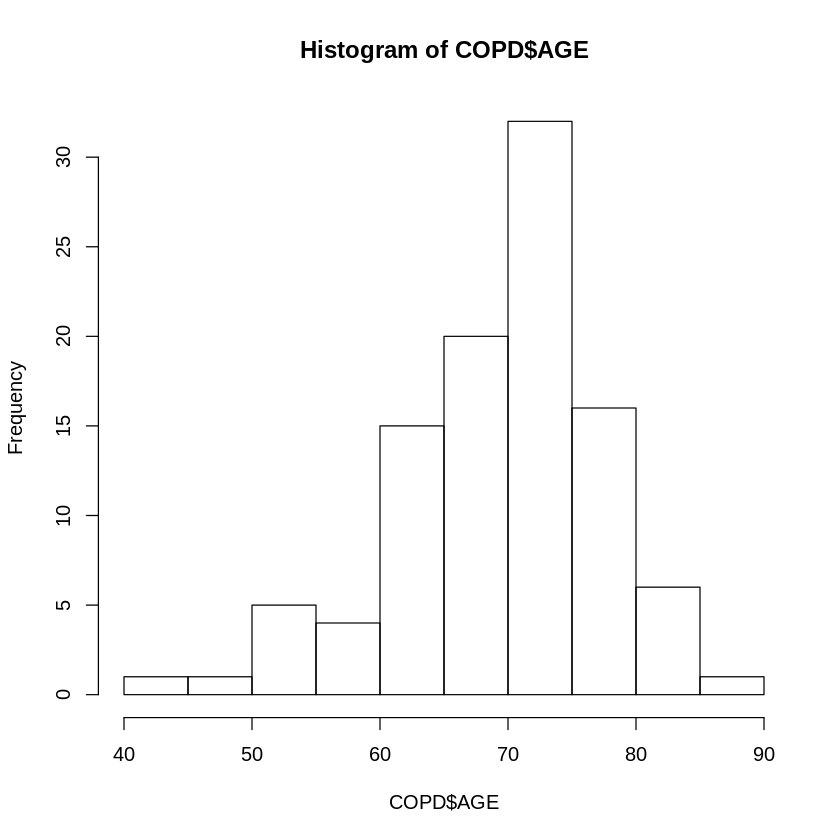

In [6]:
hist(COPD$AGE)

`hist()` distribution of variable 

### Registering variables:
Binary variables are treated similarly to categorical variables. R will by default treat variables with numbers as integers, so it's good practice to make sure R knows that a variable is meant to be categorical with the following procedure. 


In [7]:
class(COPD$gender)
COPD$gender <- as.factor(COPD$gender) 

[1] "integer"

Now, gender is registered as a categorical variable and will be treated properly in any models you create. You can see the distribution of gender in the same way as any other categorical variable. 

In [8]:
class(COPD$gender)

[1] "factor"

In [9]:
table(COPD$gender, exclude = NULL) 


 0  1 
36 65 

### how to change the variable data type record:
We want to change a variable from an interger to a factor using the following command 
`name<-factor()`


In [10]:
COPD$copd<-factor(COPD$copd)
class(COPD$copd)

[1] "factor"

If you want to change a variable to a numeric data type, use the command as.numeric(). 

If you want to change a variable to a character data type, use the command as.character(). 

If you want to change a variable to a integer data type, use the command as.integer(). 

### how to change the reference category of a categorical varaible in linear regression:

If you want to change your reference category (the varaible all other categories are compared against) then use the command `relevel()`



In [11]:
COPD$copd <- relevel(COPD$copd, ref=3)
lr1<-lm(MWT1Best~copd, data= COPD)
summary(lr1)


Call:
lm(formula = MWT1Best ~ copd, data = COPD)

Residuals:
    Min      1Q  Median      3Q     Max 
-248.67  -51.18    0.91   64.23  330.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   368.67      18.87  19.541  < 2e-16 ***
copd1          89.42      27.82   3.215  0.00178 ** 
copd2          38.33      24.18   1.585  0.11620    
copd4         -77.79      39.46  -1.971  0.05157 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.03 on 96 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1792,	Adjusted R-squared:  0.1535 
F-statistic: 6.984 on 3 and 96 DF,  p-value: 0.0002671


NOTE: this function only works with variables saved as factors!

## how to create a new variable from old ones 

You now want to create a new variable, which indicates the presence of at least one comorbidity or complete absence of comorbidities, based on the responses to the variables: Diabetes, muscular, hypertension, AtrialFib, and IHD.

Call this variable ‘comorbid’.

Firstly, you need to make sure that the different variables are saved as the correct data type in R. All variables are binary variables, coded ‘1’ for positive and ‘0’ for negative. 
We therefore expect the variables to be correctly saved as factors.
If they are not, use the command factor() to convert them to that data type, as explained previously.
Now, you need to create the vector comorbid. You will not have any data in it yet, as the data held in this vector is conditional on what is in other variables. However, you do know that you want it to be the same length as the other variables (i.e. 101 values). To do this, you can use the following command:  

comorbid <- length(COPD$Diabetes)
Once you have created this vector, you can assign it the correct values. You want a binary vector (i.e. data type is factor in R) where 1 indicates the presence of at least one comorbidity and 0 represents the complete absence of comorbidities. So:

comorbid will have a value of 1 if Diabetes = 1, OR muscular = 1, OR hypertension = 1, OR AtrialFib = 1, OR IHD = 1.
comorbid will have a value of 0 if ALL of the above variables = 0.
Once you have assigned these values to the vector, you need to make sure it is saved as a factor variable.
Here is how you code for this in R:



In [12]:
comorbid<-length(COPD$Diabetes)
comorbid[COPD$Diabetes==1|COPD$muscular==1|COPD$hypertension==1|COPD$AstrialFib==1|COPD$IHS==1]<-1
comorbid[is.na(comorbid)]
cormbid<-factor(comorbid)

numeric(0)


Once you have done this, there are different ways you can look at your data. You can: 

Look at all of the values contained in the vector by using the print() function 
Look at the structure of your data in the vector using the str() function 
Look at a specific value in your vector, for example the 15th value, specifying it using the [ ] symbols
undefined
If you want to add this new variable to your existing dataset (COPD), you can do so using the following command: 

`COPD$comorbid <- comorbid`

### The good practice steps to develop a multivariable linear regression model are:

#### 1. Inspect your variables using summary statistics and histograms for continuous variables, and tabulations for categorical variables.

This helps you identify and quantify the amount of missing information. It also helps you spot any strange or outlying observations. If you do spot any strange values you will need to decide what to do with them before you move on.

#### 2. Examine the relationship between your candidate predictor variables using cross tabulations for categorical variables and pairwise correlations and scatterplot matrices for continuous variables.

This helps you identify potential associations in your candidate predictor variables that could be problematic if included together in your multivariable model.

#### 3. Fit a simple linear regression model between the outcome and each of your candidate predictor variables.

This allows you to assess the relationship between each of your candidate predictor variables and the outcome variable. Again, this helps to spot errors in either the data or the coding, and it also allows you to anticipate what you might expect to happen when you fit the multivariable model.

### Good practice approaches to assessing and organising data:


#### The first thing is examining variable distributions using summary statistics, tabulations and graphs. 

#### The next stage is examining the relationship between candidate predictors using cross tabulations and correlations. 

#### And finally, get a feel for the relationships between each of the candidate predictors and the outcome by fitting a regression model for each variable in turn.  
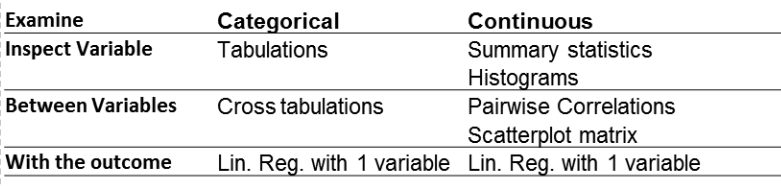




#### 1. Inspect the dataset for missing values and outliers The first thing to do is to examine the datatype and distribution for all of these variables. This can be done using the describe() function and summary() function.
This will provide the number of values, the range of the values, the number of missing values, the mean, and the different quartiles of values in our variables.


#### 2. Examine the relationship between your candidate predictor variables.
When you are familiar with each variable, the next stage is to examine the relationship between predictors using correlations and tabulations. For continuous variables, we will be using pairwise correlations and scatterplot matrices, while we will be using cross tabulations for categorical variables. 

##### Continuous variables
At the start of this course, you learned how to calculate a correlation coefficient using the cor.test() command. To see the pairwise correlation coefficient only for continuous variables, you can use the cor() command. The output of this command will be Pearson’s correlation coefficient by default. If you want Spearman’s correlation coefficient, you can specify this by adding method = ‘spearman’ in the cor() command parentheses.

So, for example, let’s say you want Pearson’s pairwise correlation coefficient for the CONTINOUS variables AGE, PackHistory, FEV1, FEV1PRED, FVC, CAT, HAD, and SGRQ. You’ll need to create a correlation matrix to view all the different correlation coefficients. This can be done using the following code:

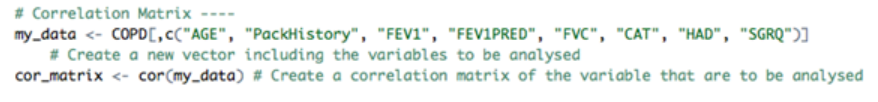

In [13]:
my_data<-COPD[,c("AGE","PackHistory", "FEV1", "FEV1PRED", "FVC", "CAT", "HAD", "SGRQ")]


In [14]:
cor_matrix<-cor(my_data)

In [15]:
cor_matrix

,AGE,PackHistory,FEV1,FEV1PRED,FVC,CAT,HAD,SGRQ
AGE,1.000000000,-0.001545507,-0.10212241,0.067458738,-0.14522574,0.083361126,-0.22712040,-0.13936121
PackHistory,-0.001545507,1.000000000,-0.13150514,-0.131340964,-0.09307289,-0.143247732,0.02787635,0.03212642
FEV1,-0.102122406,-0.131505136,1.00000000,0.776110492,0.82016501,-0.064804288,-0.14814655,-0.30340676
FEV1PRED,0.067458738,-0.131340964,0.77611049,1.000000000,0.52152997,0.007505937,-0.10946095,-0.33179490
FVC,-0.145225737,-0.093072888,0.82016501,0.521529971,1.00000000,-0.158858621,-0.12968238,-0.22009022
CAT,0.083361126,-0.143247732,-0.06480429,0.007505937,-0.15885862,1.000000000,0.16191871,0.28778173
HAD,-0.227120404,0.027876353,-0.14814655,-0.109460950,-0.12968238,0.161918708,1.00000000,0.39579044
SGRQ,-0.139361205,0.032126419,-0.30340676,-0.331794903,-0.22009022,0.287781730,0.39579044,1.00000000


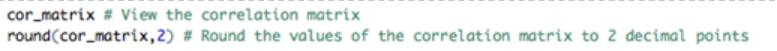

In [16]:
round(cor_matrix,2)

,AGE,PackHistory,FEV1,FEV1PRED,FVC,CAT,HAD,SGRQ
AGE,1.00,0.00,-0.10,0.07,-0.15,0.08,-0.23,-0.14
PackHistory,0.00,1.00,-0.13,-0.13,-0.09,-0.14,0.03,0.03
FEV1,-0.10,-0.13,1.00,0.78,0.82,-0.06,-0.15,-0.30
FEV1PRED,0.07,-0.13,0.78,1.00,0.52,0.01,-0.11,-0.33
FVC,-0.15,-0.09,0.82,0.52,1.00,-0.16,-0.13,-0.22
CAT,0.08,-0.14,-0.06,0.01,-0.16,1.00,0.16,0.29
HAD,-0.23,0.03,-0.15,-0.11,-0.13,0.16,1.00,0.40
SGRQ,-0.14,0.03,-0.30,-0.33,-0.22,0.29,0.40,1.00


To visualise these correlation coefficents:


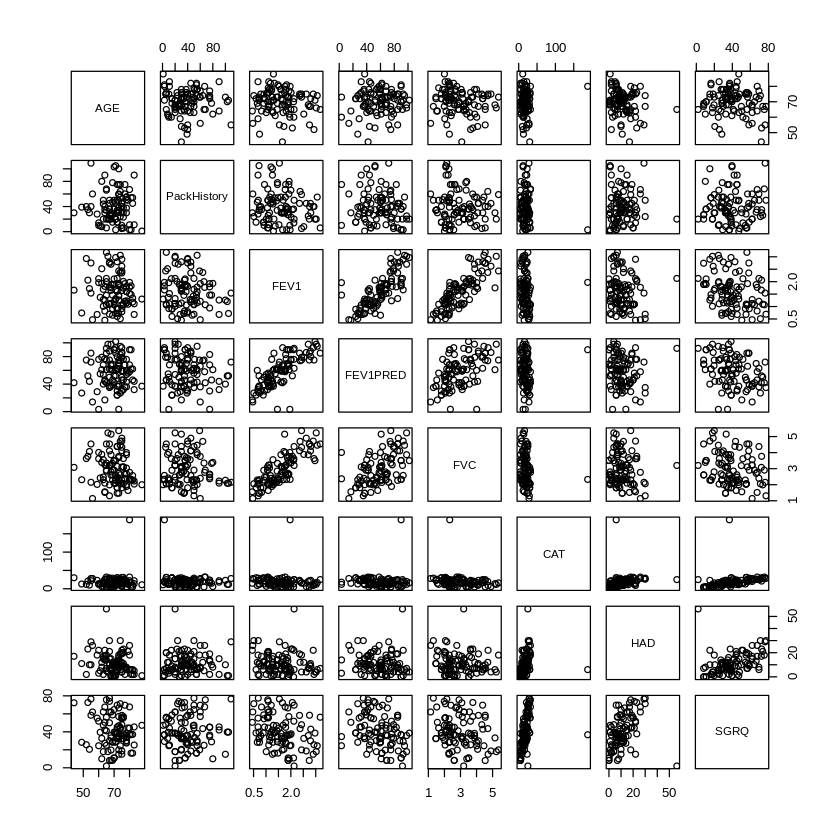

In [17]:
pairs(~AGE+PackHistory+FEV1+FEV1PRED+FVC+CAT+HAD+SGRQ, data=COPD)

##### Categorical variables
To examine associations between categorical variables, you can use cross tabulations. 
For this, you will again use the CrossTable() function from the ‘gmodels’ package, but adding your variables in the following format: `CrossTable(mydata$myrowvar, mydata$mycolvar)`. 



In [18]:
install.packages("gmodels")

also installing the dependencies ‘gtools’, ‘gdata’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [19]:
library(gmodels)

In [20]:
CrossTable(COPD$gender, COPD$IHD)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  101 

 
             | COPD$IHD 
 COPD$gender |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        34 |         2 |        36 | 
             |     0.044 |     0.455 |           | 
             |     0.944 |     0.056 |     0.356 | 
             |     0.370 |     0.222 |           | 
             |     0.337 |     0.020 |           | 
-------------|-----------|-----------|-----------|
           1 |        58 |         7 |        65 | 
             |     0.025 |     0.252 |           | 
             |     0.892 |     0.108 |     0.644 | 
             |     0.630 |     0.778 |           | 
             |     0.574 |     0.069 |           | 
-------------|-----------|-----------|------

#### 3. Fit a simple linear regression model

And finally, it’s useful to assess the relationship for each of variable in turn with the outcome. You can do this by fitting a regression model with just a single predictor in. Doing this allows an opportunity to spot anything unusual that may due to errors in either the data or coding of the variable, and also allows you to anticipate what you might expect to happen when you fit the multivariable model. 

Recall that fitting a linear regression model uses the lm() function in the following format:

model_name <- lm(outcome ~ predictor, data =dataframe)

summary(model_name)

confint(model_name)  

Summary 

### How to exlude data from a variable 

CAT had an outlier of 188 (normal CAT range is 0-40). This outlier needs to be excluded from our analysis.

`variabelname[varaiblename>outliernumber]<-NA`

In [21]:
COPD$CAT[COPD$CAT>40]<-NA

In [22]:
summary(COPD$CAT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   3.00   12.00   18.00   17.65   23.25   32.00       1 

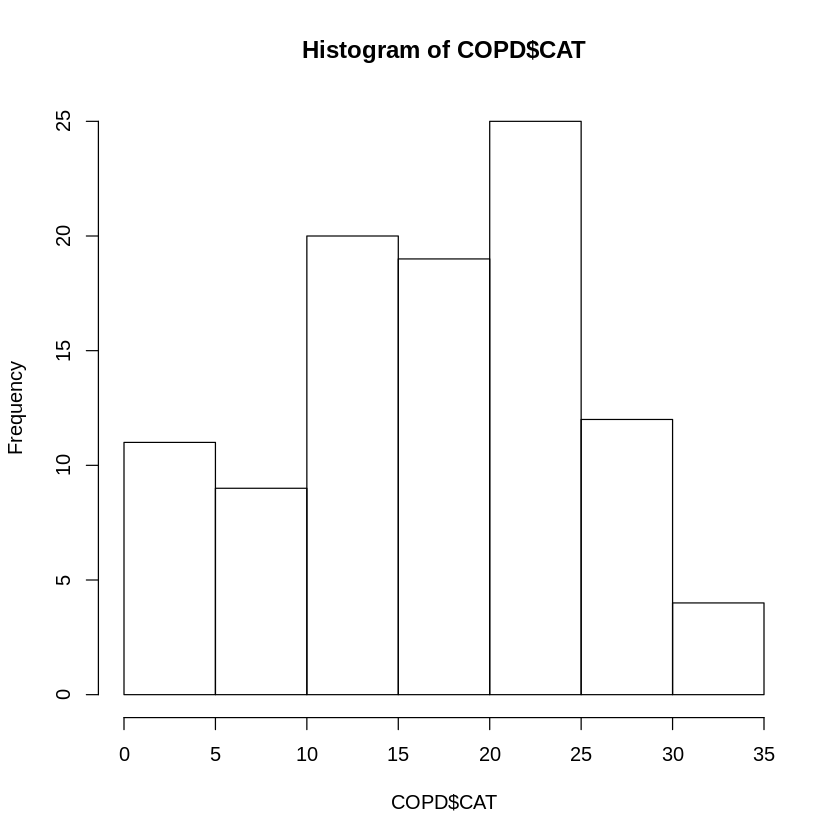

In [23]:
hist(COPD$CAT)

### Checking interactions between binary variables
Example: MWT1best= α+ β1∗Diabetic+ β2∗AtrialFib+ β3∗Diabetic∗AtrialFib

where:

Diabetic = 0 if diabetes not present, 1 if present

AtrialFib = 0 if atrial fibrillation not present, 1 if present

Diabetic*AtrialFib = 0 if diabetes or atrial fibrillation not present, and 1 if diabetes and atrial fibrillation present.

To fit this model in R you first need to create the Diabetic*AtrialFib variable.
Note: R will not be able to create this new variable if the Diabetes and AtrialFib variables are saved as factors! They therefore need to remain/be changed to integers. 

Diabetes AND AtrialFib are already intergers. 

BUT if they weren't this is how you do it...


`COPD$AtrialFib<-c(0,1)[as.integer(COPD$AtrialFib)]`

Now we need to creat a new varaible that contains pateints with both COPD and AstrialFib

In [44]:
DAF<-COPD$Diabetes*COPD$AtrialFib

Now code for the regression model that will assess all these factors.

In [45]:
r1<-lm(MWT1Best~factor(Diabetes)+factor(AtrialFib)+factor(DAF), data=COPD)
summary(r1)
confint(r1)
#confint is for looking at the confidence intervals


Call:
lm(formula = MWT1Best ~ factor(Diabetes) + factor(AtrialFib) + 
    factor(DAF), data = COPD)

Residuals:
    Min      1Q  Median      3Q     Max 
-218.15  -51.88   18.70   51.85  270.86 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          428.14      10.39  41.200  < 2e-16 ***
factor(Diabetes)1     -7.69      28.02  -0.274  0.78436    
factor(AtrialFib)1   -72.05      29.21  -2.467  0.01541 *  
factor(DAF)1        -130.11      47.70  -2.727  0.00759 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 86.32 on 96 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3635,	Adjusted R-squared:  0.3437 
F-statistic: 18.28 on 3 and 96 DF,  p-value: 1.841e-09


,2.5 %,97.5 %
(Intercept),407.51714,448.77272
factor(Diabetes)1,-63.31939,47.93862
factor(AtrialFib)1,-130.02332,-14.06653
factor(DAF)1,-224.80156,-35.41768


#### No interaction included:
From this equation, you can see that when patients don't have either diabetes or atrial fibrillation, their predicted mean walking distance is 428.1 meters. This is because the last two terms in the regression model will be zero.
Start transcript at 1 minute 52 seconds1:52

If a patient is diabetic, the distance is predicted to be 56.2 meters less. For patients with atrial fibrillation, 120.8 meters less. For a person with both atrial fibrillation and diabetes, the assumption is that these effects are independent and additive. 

So the model predicts walking distance to be 286 meters if they had both conditions.

#### Interaction included:
including an interaction term in the model drastically changes the interpretation of all other regression coefficients. This is why it can be helpful to write out the regression equation in order to work out now what these mean. Before, the beta one coefficient could be interpreted as the unique effect of being diabetic.

But with an interaction term included, the effect of now being diabetic depends on the effect of a third variable, atrial fibrillation.

Here are the results of the regression model with an interaction tab included. You can see that the regression coefficients have changed substantially from the previous model, that's because they now represent something different. There's a significant interaction between the two comorbidities and if we write out the regression equation, you can see that the mean walking distance for diabetes patients will depend on whether or not they also have atrial fibrillation.

The mean walking distance for patients without either is still 428 meters, as the last returns will be zero.

For diabetic patients without atrial fibrillation, we calculate their predicted mean walking distance as 428 minus 7.7 meters. For diabetic patients that do have atrial fibrillation, if you work through the sums, you'll see that their predicted walking distance is now 218. Much lower than the 286 predicted from the model without the interaction.

#### Run this practice again with gender and smoking on MWT1Best:

1.Change to intergers:

`COPD$gender<-c(0,1)[as.integer(COPD$gender)]`

In [63]:
class(COPD$smoking)
class(COPD$gender)
COPD$gender<-as.integer(COPD$gender)

[1] "integer"

[1] "integer"

In [64]:
SG<-COPD$smoking*COPD$gender

In [67]:
r1<-lm(MWT1Best~factor(smoking)+factor(gender)+factor(SG), data=COPD)

In [69]:
summary(r1)
confint(r1)


Call:
lm(formula = MWT1Best ~ factor(smoking) + factor(gender) + factor(SG), 
    data = COPD)

Residuals:
    Min      1Q  Median      3Q     Max 
-289.67  -90.00   17.42   76.52  289.33 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        367.57      40.48   9.080 1.41e-14 ***
factor(smoking)2    14.91      45.10   0.331    0.742    
factor(gender)1     27.19      24.58   1.106    0.271    
factor(SG)1         17.91      59.31   0.302    0.763    
factor(SG)2            NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 107.1 on 96 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02026,	Adjusted R-squared:  -0.01036 
F-statistic: 0.6617 on 3 and 96 DF,  p-value: 0.5776


,2.5 %,97.5 %
(Intercept),287.21892,447.92394
factor(smoking)2,-74.61519,104.43785
factor(gender)1,-21.59744,75.97738
factor(SG)1,-99.81677,135.62731
factor(SG)2,NA,NA


### Interactions between binary and continuous varaibles

Example: Lung function outcome 
CAT/Disease severity (continuous) and smoking status (binary)

The research question we're going to explore is, is disease severity and smoking status related to lung function? 

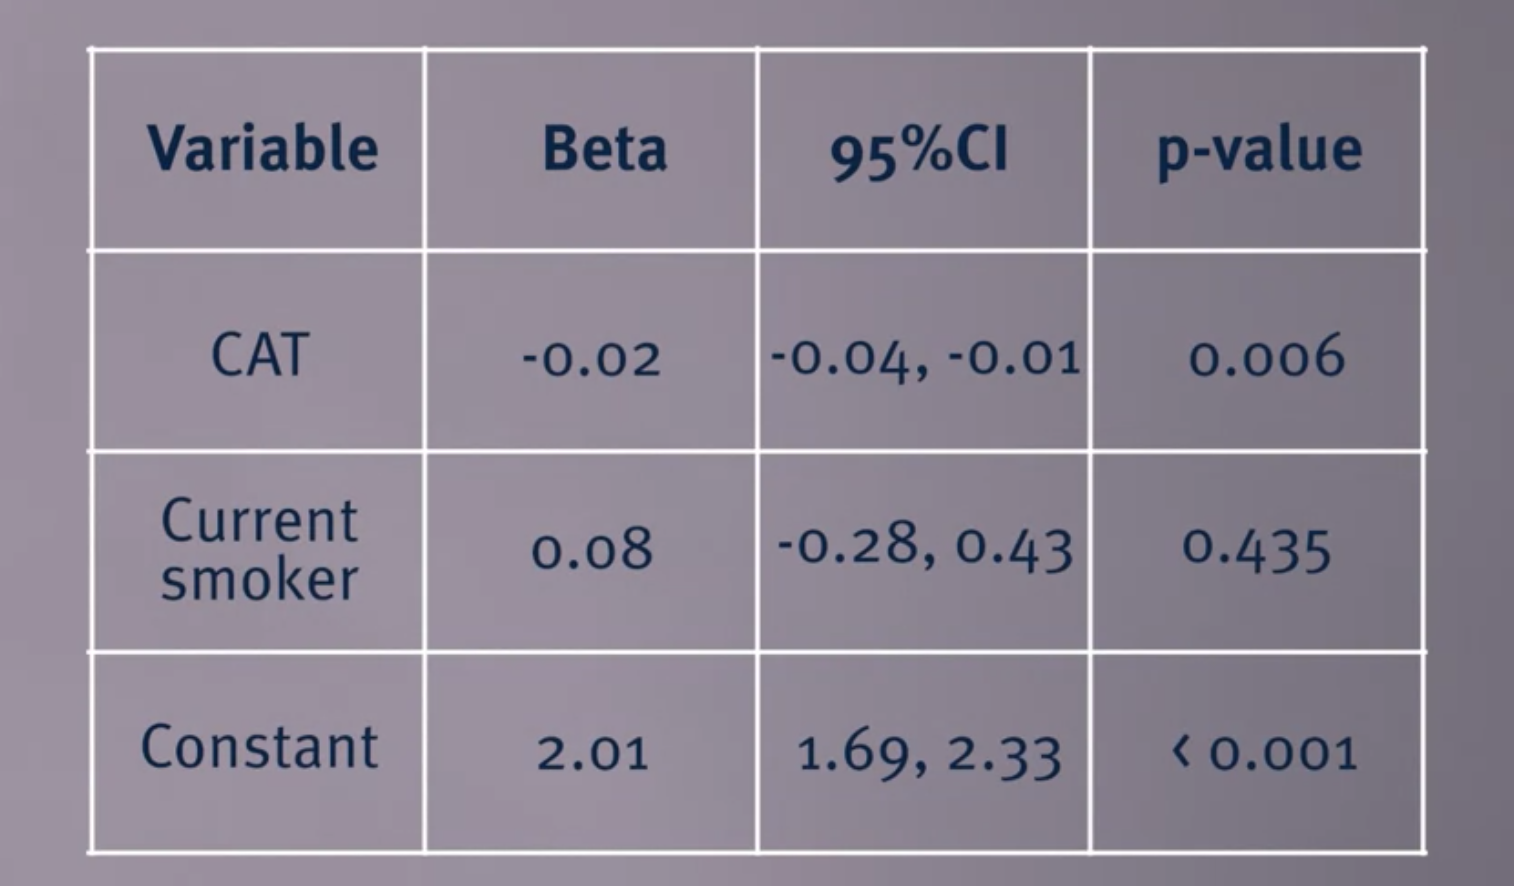


For every one unit change in cat FEV1 decreases on average by 0.02 - there is a significant relationship here. 
Current smoker are predicted to have an average FEV1 score 0.08 higher than non smokers. But this is not significant. 

We can explore a potential interaction but including an interaction term in the model. 
CAT*smoking status. 

Must check that the binary variable is coded as an 0,1 integer. 

In [78]:
class(COPD$smoking)

[1] "integer"

In [79]:
COPD$smoking<-c(0,1)[as.integer(COPD$smoking)]

In [80]:
summary(COPD$smoking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8416  1.0000  1.0000 

#### Interaction term included:

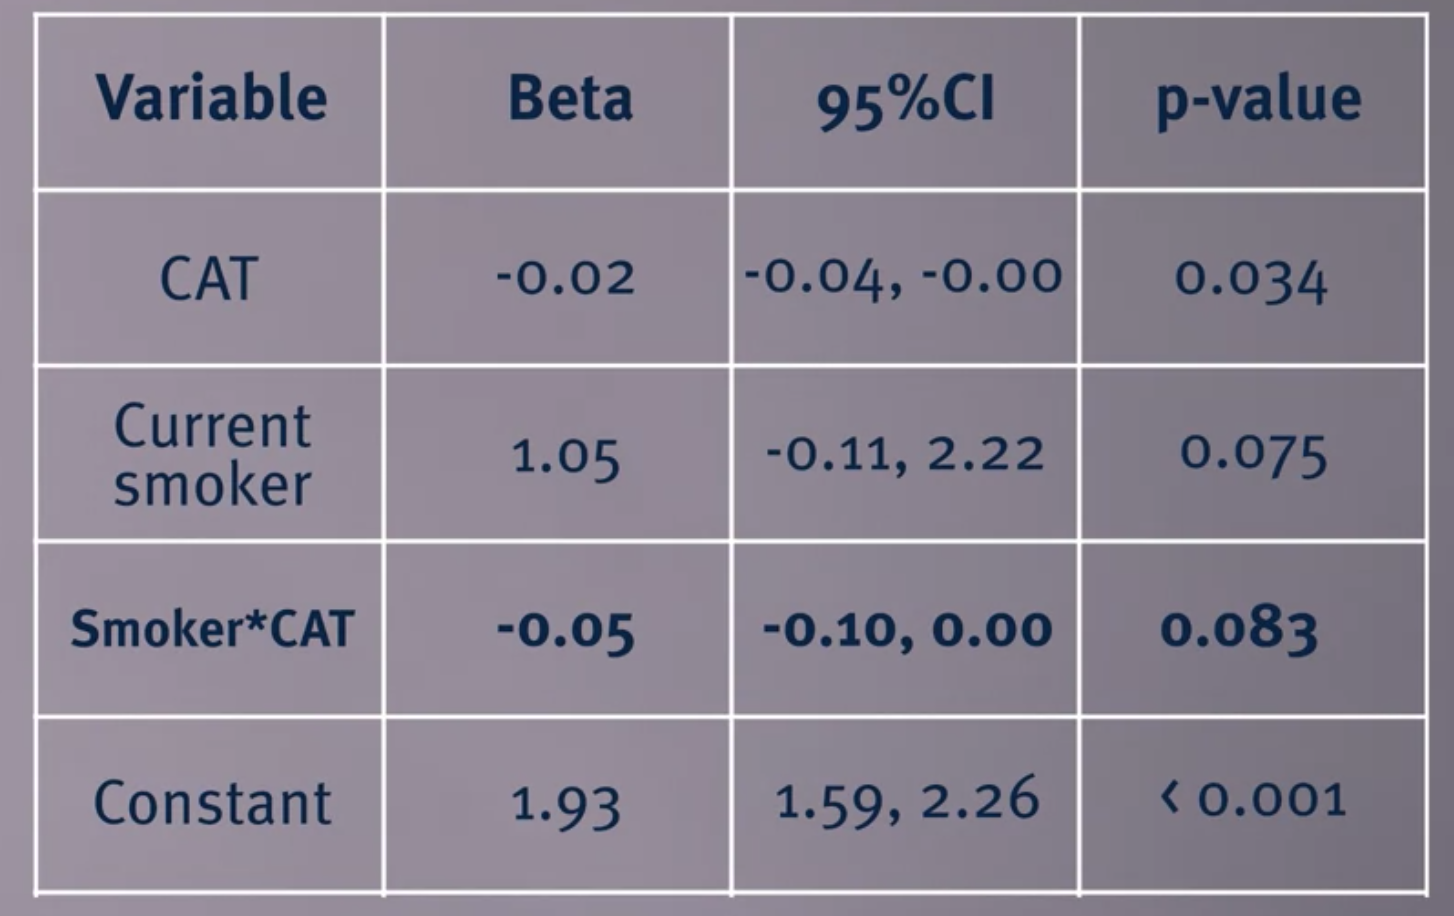

You'll see there's some evidence for an interaction between disease severity and smoking status.

The P value is not statistically significant at the 5% level but with the sample size of only 100, we wouldn't necessarily expect to be able to detect important interaction differences.

## SUMMARY OF CODE

##### New Script

Remove previous variables: `rm(list=ls()` 
Set the working directory:  `setwd(“file_pathway”)`
Loading a dataset, labelling it ‘COPD’:  `COPD <- read.csv("COPD_student_dataset.csv")`

##### Install a new package

`install.packages(“Package name”)`
`library(Package name)`

##### Viewing the dataset

Look at the whole dataset: `View(COPD)` 
Print the first few rows of your dataset: `head(COPD)` 
See how many rows and columns you have in your dataset: `dim(COPD)` 
Look at the different variables in the dataset: `colnames(COPD)`
Look at all the values in a variable: `print(variable)`
To visualise the structure of the data in a variable: `str(variable)`
Look at a specific value (x) in a variable: `variable[x]`

##### For continuous variables:

View number of values, missing values, mean and ranges using the describe() function from the ‘Hmisc’ package.
For categorical variables:

View number of values, missing values, mean and ranges using the `describe()` function from the ‘Hmisc’ package OR Tabulate the data to view the number of values and their frequency using the `CrossTable()` function from the ‘gmodels package. To view missing values, type: `sum(is.na(variable))`.

Viewing the categories and distribution of entries in a categorical variable: `table(catvariable)`
You can add the argument exclude = NULL in the function parentheses to include missing values in the output.
Running a linear regression

The basic format is:

`modelname <- lm(outcome~predictor, data = dataframe)`
Viewing the regression model output: `summary(modelname)`
Viewing the model 95% confidence intervals: `confint(modelname)`

##### Drawing a Q-Q plot, constant variance plot, and other diagnostic plots

Calculate predicted values: `predict(modelname)`
Calculate residuals: `residuals(modelname)`
Set a plotting format of 4 graphs: `par(mfrow=c(2,2))` 
View the 4 resulting plots: `plot(modelname)`

##### Create a histogram

The basic format is: `hist(variablename)`
If you are getting a variable from the dataset, the $ sign allows R to locate this variable. E.g. `COPD$MWT1Best`
To change the title of the histogram, use the command: `main = “histogram title”`
Don’t forget quotation marks when using text!
To change the x or y axes labels, use the commands: `xlab = “x axis label”` or `ylab = “y axis label”`
Don’t forget quotation marks using text!
To change the number of bins displayed, use the command `main =` to specify the number of bins you want to see.
To look at specific values in your variable, you can use the `subset()` function, using the basic code `subset(dataframe, variable > 15)` if you want to see values over 15 for that variable. You can add additive rules by including ‘|’, e.g. `subset(dataframe, variable1 > 15 | variable2 < 5)`

##### Summary statistics  

Basic summary statistics (incl. minimum, medium, maximum, 1st and 3rd quartiles, and number of blank cells): `summary(variablename)`
List of summary statistics, including the basic summary() outcome, standard deviation, range, and inter-quartile range:  
`list(summary(variablename)`, `sd(variablename, na.rm = TRUE)`, `range(variablename, na.rm = TRUE)`, `IQR(variablename, na.rm = TRUE))`
Note that the na.rm = TRUE command tells R to remove NA values. Without this, an error message will be displayed.
Correlation

Scatterplot of two variables: `plot(x, y)`
Correlation coefficient: `cor(x, y)`
The default method is Pearson, but you can change this to Spearman by adding `method = “spearman”` in your parentheses. You need to remove missing values, otherwise you will get an error message. To do this, add use = “complete.obs” in your parentheses.
Correlation test: `cor.test(x, y)`
The default method is also Pearson here. You also need to remove missing values to avoid an error message.

Creating a correlation matrix:

Create a vector with the variables to include in the matrix,  e.g. `data <- COPD[,c(“AGE”, “PackHistory”, “FEV1”)]`
Create the correlation matrix vector, assigning correlation coefficients of the different variables to it,  e.g. `cor_matrix <- cor(data)`
View the matrix: e.g. `cor_matrix` to view the output and `round(cor_matrix,2)` to round this output to 2 decimal points.
Visualising correlation between variables, i.e. `correlation plot: pairs(~ variable1 + variable2 + variable3, data = dataframe)`

##### Multiple linear regression

The basic format is:

`modelname <- lm(outcome~predictor1 +  predictor2, data = dataframe)`
Viewing the regression model output: `summary(modelname)`
Viewing the model 95% confidence intervals: `confint(modelname)`
Examining the VIF using the `imcdiagF()` function from the ‘mctest’ package.

Regression with categorical variables

2 ways to do this:

Check what the variable is saved as, change it to a factor variable if it is not saved as such.
Check what the variable has been saved as using the `class()` function
If it is not saved as a factor, can it using the `factor()` command, in the following format: `variable <- factor(variable)`
Run the regression as normal
Include factor() before the variable in the regression model. E.g. `modelname <- lm(outcome~predictor1 + factor(predictor2),  data = dataframe)`

##### Changing the reference category of a variable:

Use the `relevel()` function in the following format: `variable <- relevel(variable, ref = newreflevel)` with the newreflevel  being the new reference level, written either as a numeric (1, 2, 3, …) or a character (in which case it needs to be written within apostrophes – “MILD”, “SEVERE”, …)

##### Changing data type for a variable

Check what the variable has been as using the `class()` function.
Changing data type:
To numeric: `as.numeric()`
To character: `as.character()`
To factor: `factor()` or `as.factor()`
To integer: `as.integer()`

##### Creating a new variable on R: e.g. variable ‘comorbid’  

comorbid is a variable you were asked to create. This variable was to be binary, and indicated the presence of at least one comorbidity (‘1’) or complete absence of comorbidities (‘0’) based on the responses to the variables: Diabetes, muscular, hypertension, AtrialFib, and IHD. 

Check that all variables are saved as the correct datatype.
Create an empty vector of the correct length.
Here, comorbid will be the same length as the other variables, so:
`comorbid <- length(COPD$Diabetes)`
Assign values to this vector.
Here, we want comorbid = 1 when Diabetes OR muscular OR hypertension OR AtrialFib OR IHD = 1. So: `comorbid[COPD$Diabetes == 1 | COPD$muscular == 1 | COPD$hypertension == 1 | COPD$AtrialFib == 1 | COPD$IHD == 1] <- 1`
This will assign 1 to the values meeting the set conditions, and NAs to those that are not meeting those conditions.
We also want comorbid = 0 when ALL above variables = 0. So: `comorbid[is.na(cormorbid)] <- 0`
Convert this variable to a factor.
Optional: add the variable to the dataset, using the following command `COPD$comorbid <- cormorbid`


##### Regression with interaction effect

Use the same format as a multiple linear regression, but include both terms, i.e.
`modelname <- lm(outcome~predictor1 +  predictor2 + (predictor1 * predictor2),  
data = dataframe)`
Interpretation of the interaction effect can be simplified using the `prediction()`
function from the ‘prediction’ package.
